# Costumer Shopping Insights

## Objective
#### We need to analyse the spreadsheet in order to obtain costumer shopping insights. We will try to understand patterns among the stats so it's possible to make the right decisions.

## Loading the Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv('C:/Users/migue/Programação/.vscode/python/data_science/Portfolio/Costumer_Shopping_Insights/shopping_trends.csv')
df.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Venmo,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Debit Card,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Debit Card,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Venmo,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,PayPal,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


## Preparing the Dataset with Basic Informations

### Checking Numerical Stats

In [3]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


### Columns Stats

**- Customer ID** - Used to identify the clients;<br>
**- Age** - Used to identify the age of the clients;<br>
**- Gender** - Used to identify the gender of the clients;<br>
**- Item Purchased** - Used to identify the products bought;<br>
**- Category** - Used to identify the category of the products;<br>
**- Purchase Amount (USD)** - Used to identify the price of the products;<br>
**- Location** - Used to identify the states;<br>
**- Size** - Used to identify the size of the products;<br>
**- Color** - Used to identify the color of the products;<br>
**- Season** - Used to identify the season when the products were bought;<br>
**- Review Rating** - Used to identify how the produtc was reviewed;<br>
**- Subscription Status** - Used to identify the client as a subscriber or not;<br>
**- Payment Method** - Used to identify the payment method used;<br>
**- Shipping Type** - Used to identify the shipping type ;<br>
**- Discount Applied** - Used to identify if there was a discount;<br>
**- Promo Code Used** - Used to identify if there was a promo code;<br>
**- Previous Purchases** - Used to identify if there was other previous purchases by the same client;<br>
**- Preferred Payment Method** - Used to identify the preferred payment method;<br>
**- Frequency of Purchases** - Used to identify when the costumers are used to buy;

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

### Checking Null Values

In [5]:
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

## Exploratore Analysis

### Gender

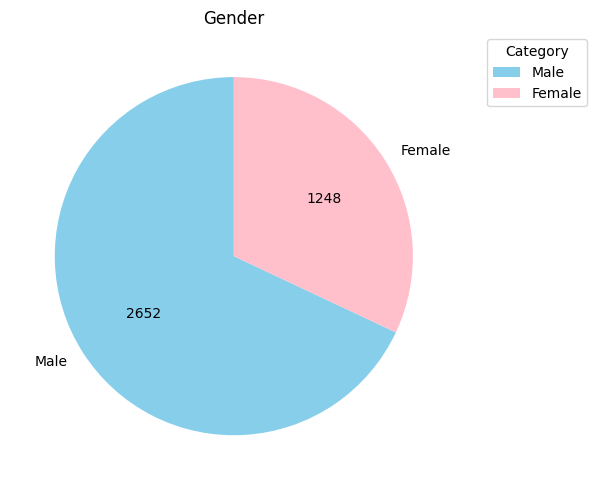

In [6]:
gender_count = df['Gender'].value_counts()

def autopct_values(pct, all_values):
    absolute = int(round(pct / 100. * sum(all_values)))  # Calculate the absolute value
    return f"{absolute}"  # Return just the number

gender_count.plot(kind= 'pie', colors = ['skyblue', 'pink'], figsize = (6,5),autopct=lambda pct: autopct_values(pct, gender_count), startangle = 90, labels = ['Male', 'Female'])
plt.title('Gender')
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('')
plt.tight_layout()
plt.show()

### Age

#### Here we are creating a range distribution based on age. <br>The idea is to see the amount of people inside the age groups.

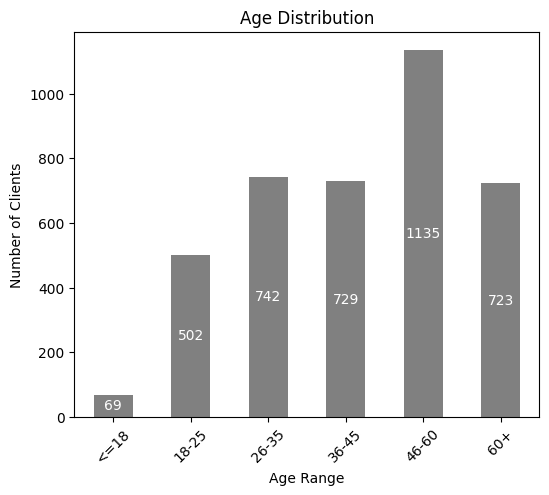

In [7]:
df['age_group'] = pd.cut(df['Age'], bins = [0, 18, 25, 35, 45, 60, 100], labels = ['<=18', '18-25', '26-35', '36-45', '46-60', '60+'])
age_counts = df['age_group'].value_counts()
ax = age_counts.sort_index().plot(kind = 'bar', color = 'grey', figsize = (6,5))

for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=10, color='white')

plt.title('Age Distribution')
plt.xlabel('Age Range')
plt.ylabel('Number of Clients')
plt.xticks(rotation=45)
plt.show()

### Frequency of Purchases

#### Here we are trying to see how frequently the costumers buy products.

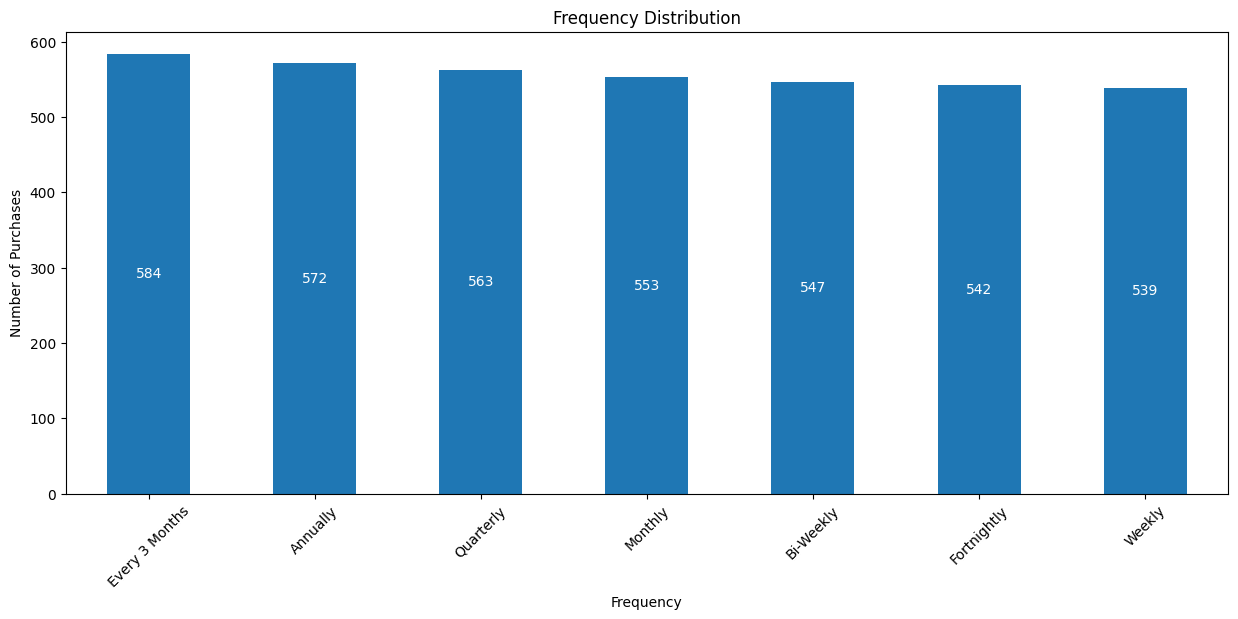

In [8]:
frequency_of_purchase = df['Frequency of Purchases'].value_counts()
ax = frequency_of_purchase.plot(kind = 'bar', figsize = (15,6))

for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=10, color='white')

plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()

### Products Categories

#### Here we are seeing how many purchases were made by categories.

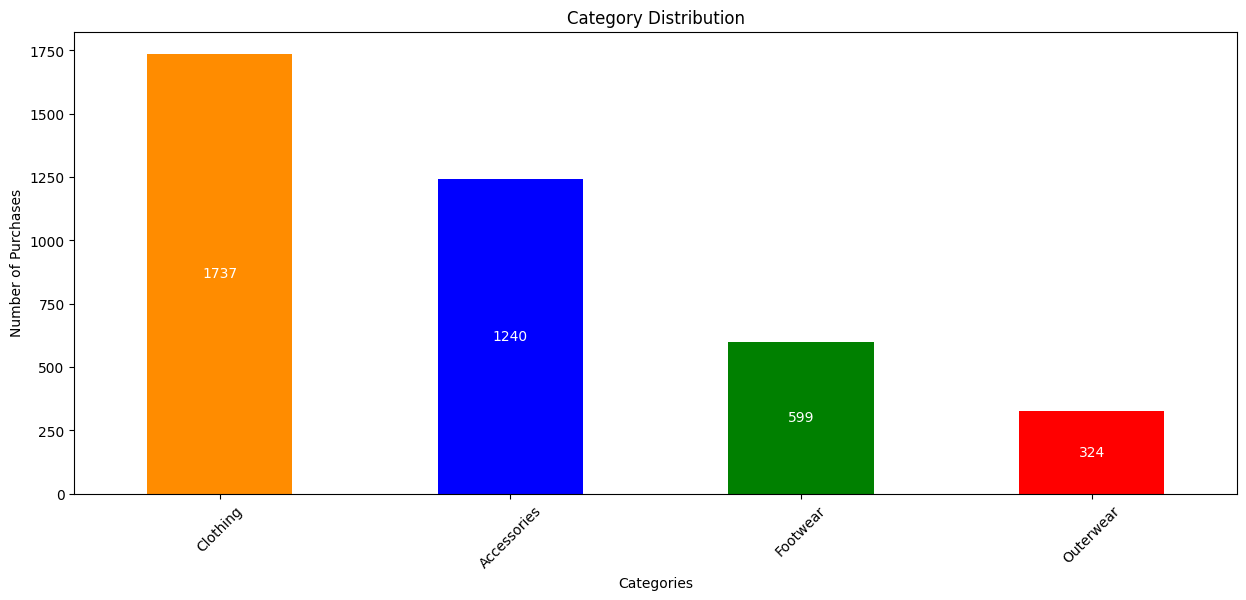

In [9]:
category_name = df['Category'].value_counts()
ax = category_name.plot(kind = 'bar', color = ['darkorange', 'blue', 'green', 'red'], figsize = (15,6))

for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=10, color='white')

plt.title('Category Distribution')
plt.xlabel('Categories')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()

### Products

#### Seeing the most bought products 

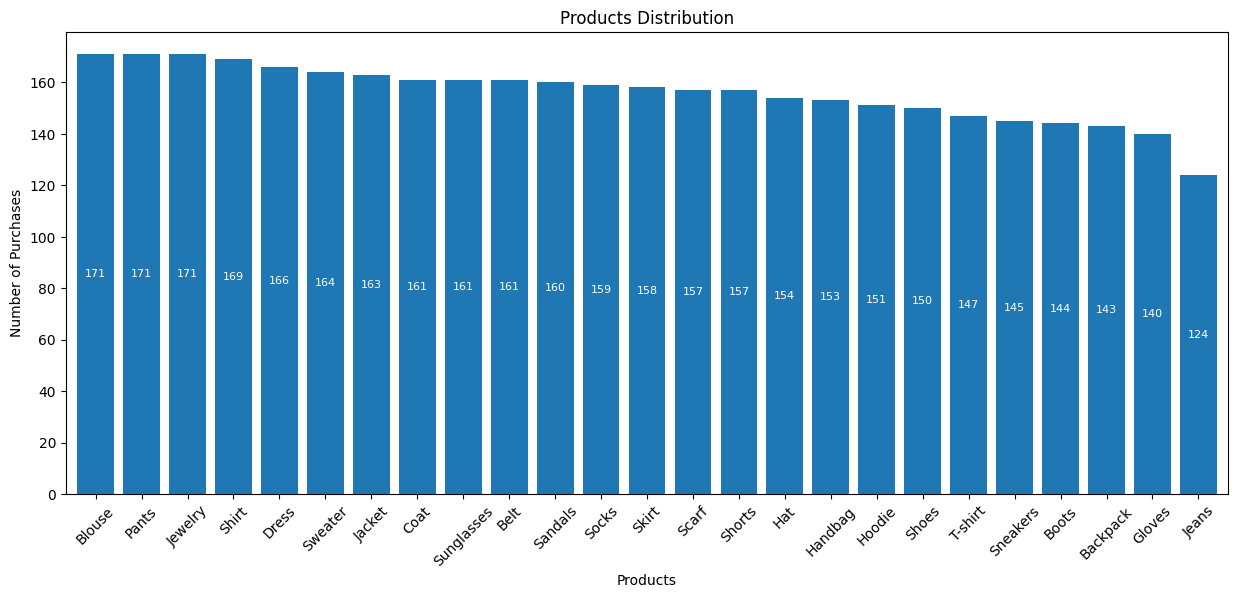

In [10]:
item_name = df['Item Purchased'].value_counts()
ax = item_name.plot(kind = 'bar', figsize = (15,6), width = 0.8)

for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=8, color='white')

plt.title('Products Distribution')
plt.xlabel('Products')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()

#### Price of the products

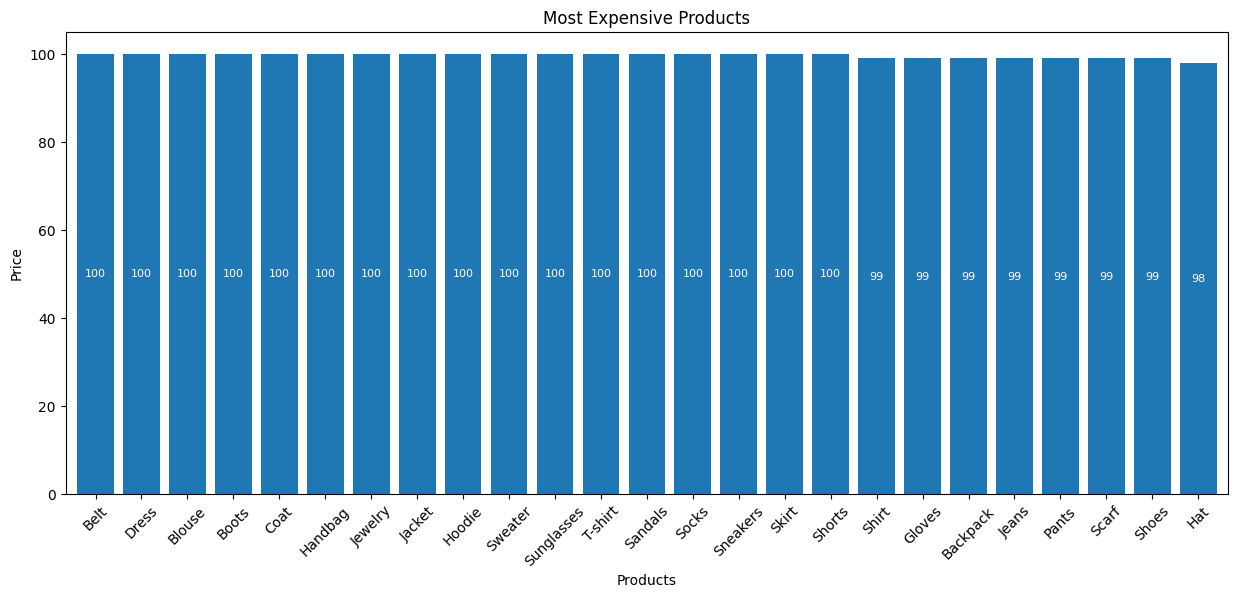

In [11]:
item_price_amount = df.groupby('Item Purchased')['Purchase Amount (USD)'].max()
most_expensive = item_price_amount.sort_values(ascending = False)
ax = most_expensive.plot(kind = 'bar', figsize = (15,6), width = 0.8)

for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=8, color='white')

plt.title('Most Expensive Products')
plt.xlabel('Products')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

### Season

#### Categories by Season

#### Checking how many items separeted by categories were made in each season of the year.

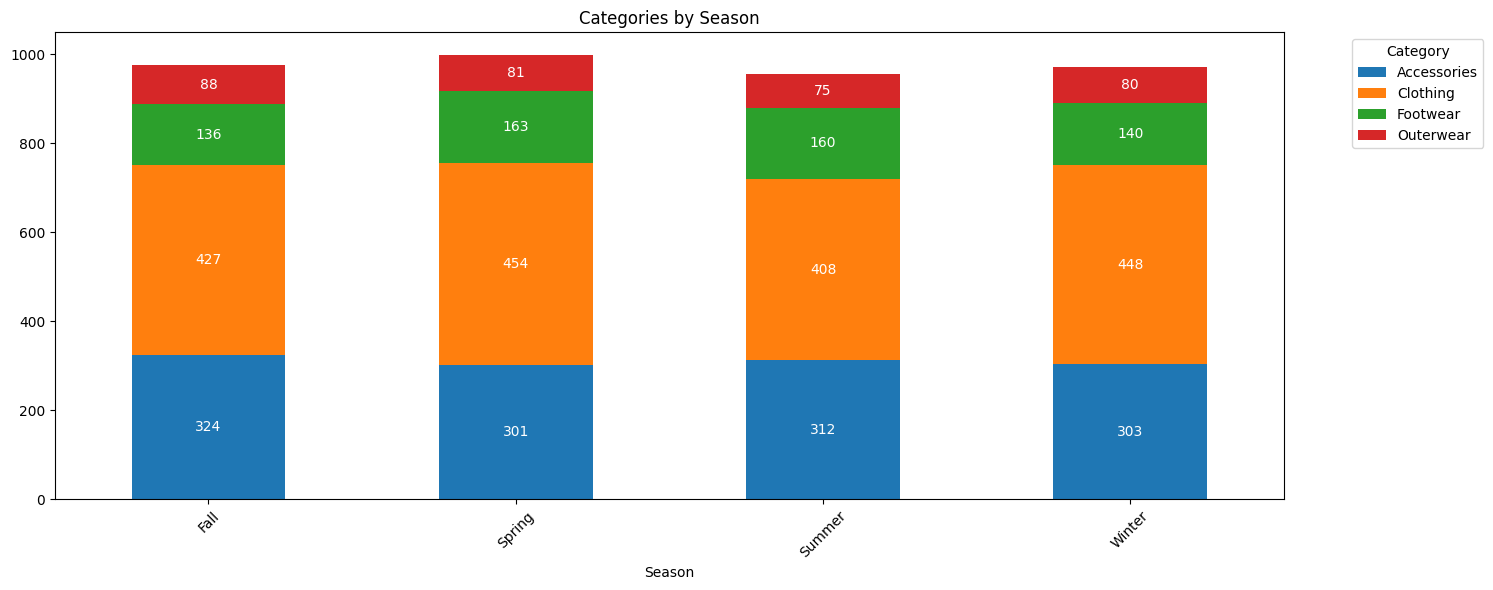

In [12]:
season_category = df.groupby(['Season', 'Category']).size().unstack()
ax = season_category.plot(kind = 'bar', stacked = True, figsize = (15, 6))

for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=10, color='white')

plt.title('Categories by Season')
plt.xlabel('Season')
plt.ylabel('')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Relation by Season x Shipping Type

Cross Table by Season x Shipping Type
Shipping Type  2-Day Shipping  Express  Free Shipping  Next Day Air  Standard  \
Season                                                                          
Fall                      154      169            168           171       168   
Spring                    178      173            164           150       157   
Summer                    145      145            179           151       166   
Winter                    150      159            164           176       163   

Shipping Type  Store Pickup  
Season                       
Fall                    145  
Spring                  177  
Summer                  169  
Winter                  159  


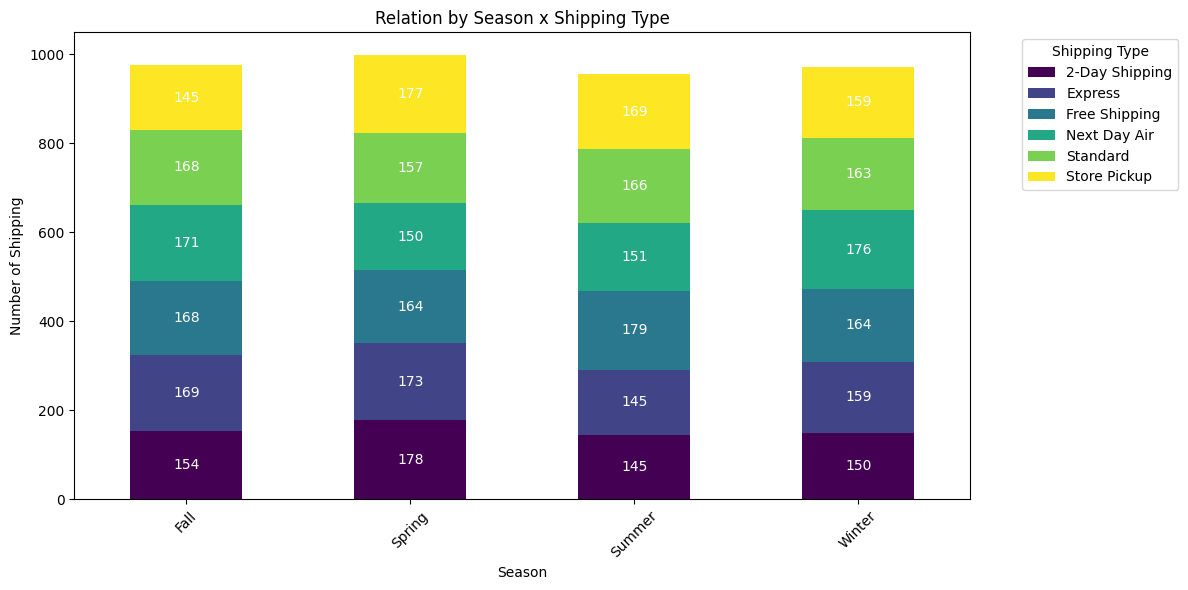

In [13]:
season_shipping = pd.crosstab(df['Season'], df['Shipping Type'])

print('Cross Table by Season x Shipping Type')
print(season_shipping)

ax = season_shipping.plot(kind = 'bar', stacked = True, figsize = (12,6), colormap = 'viridis')

for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=10, color='white')

plt.title('Relation by Season x Shipping Type')
plt.xlabel('Season')
plt.ylabel('Number of Shipping')
plt.legend(title='Shipping Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Top 3 Products by Season

Top 3 Products by Season:
    Season Item Purchased  Count
10    Fall         Jacket     54
8     Fall            Hat     50
7     Fall        Handbag     48
48  Spring        Sweater     52
43  Spring         Shorts     47
27  Spring         Blouse     46
63  Summer          Pants     50
55  Summer          Dress     47
62  Summer        Jewelry     47
97  Winter     Sunglasses     52
88  Winter          Pants     51
91  Winter          Shirt     50


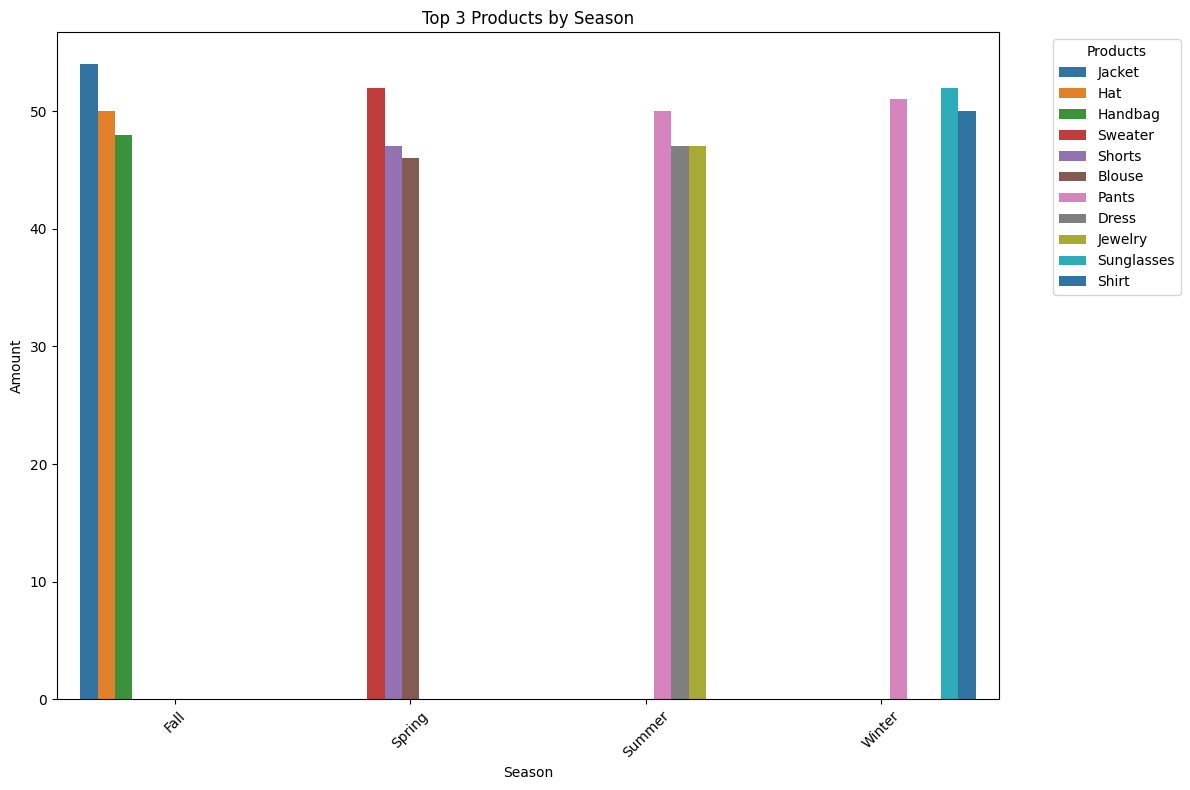

In [14]:
item_season_category = df.groupby(['Season', 'Item Purchased']).size().reset_index(name = 'Count')
item_season_category = item_season_category.sort_values(by = ['Season', 'Count'], ascending = [True, False])

top_item_season = item_season_category.groupby('Season').head(3)

print('Top 3 Products by Season:')
print(top_item_season)

plt.figure(figsize = (12,8))
sns.barplot(x = 'Season', y = 'Count', hue = 'Item Purchased', data = top_item_season, palette = 'tab10')


plt.title('Top 3 Products by Season')
plt.xlabel('Season')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend(title="Products", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Color

#### The most preferred colors

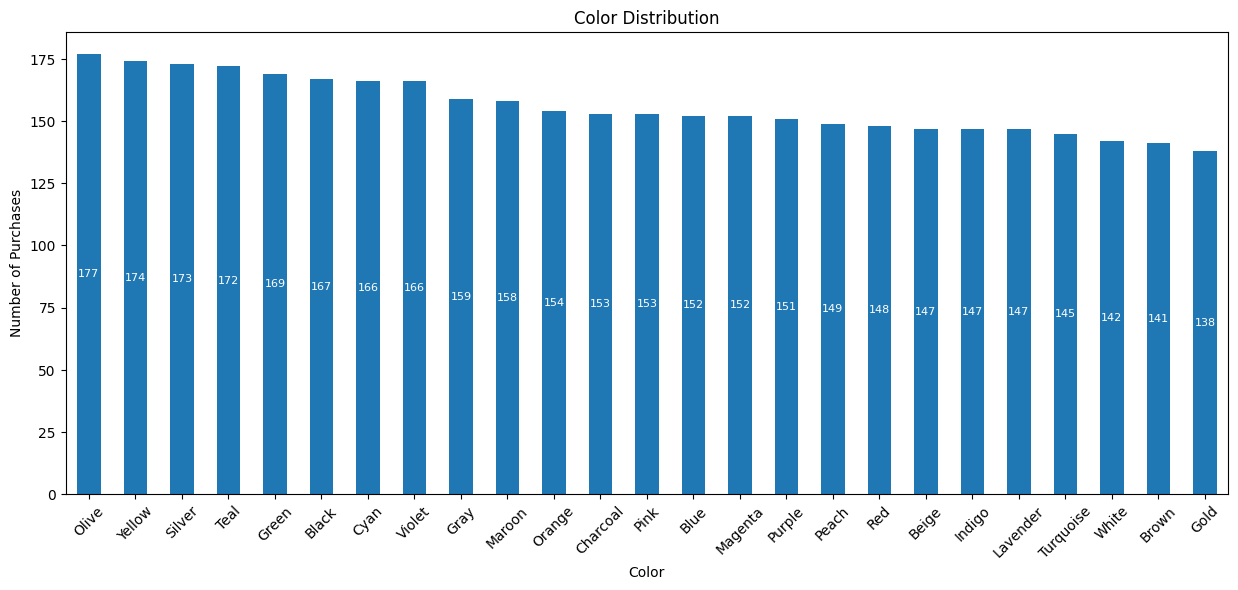

In [15]:
color_counts = df['Color'].value_counts()
ax = color_counts.plot(kind = 'bar', figsize = (15,6))

for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=8, color='white')

plt.title('Color Distribution')
plt.xlabel('Color')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()

#### Top Colors by Categories

Top 3 Colors by Category:
       Category   Color  Count
13  Accessories   Olive     66
2   Accessories    Blue     59
7   Accessories    Gray     59
45     Clothing    Teal     84
37     Clothing  Maroon     83
26     Clothing   Black     81
63     Footwear   Olive     31
72     Footwear  Violet     30
74     Footwear  Yellow     30
77    Outerwear    Blue     19
88    Outerwear   Olive     19
80    Outerwear    Cyan     16


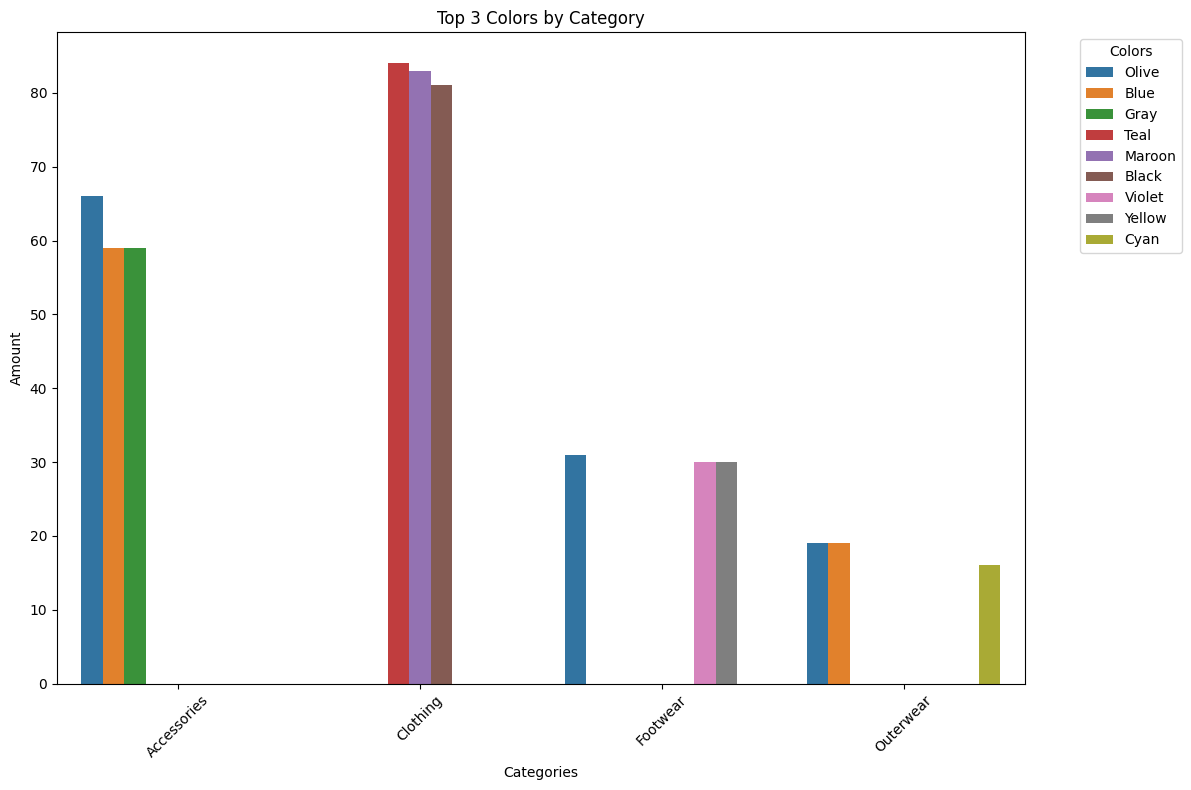

In [16]:
color_category = df.groupby(['Category', 'Color']).size().reset_index(name = 'Count')
color_category = color_category.sort_values(by = ['Category', 'Count'], ascending = [True, False])

top_colors = color_category.groupby('Category').head(3)

print('Top 3 Colors by Category:')
print(top_colors)

plt.figure(figsize = (12,8))
sns.barplot(x = 'Category', y = 'Count', hue = 'Color', data = top_colors, palette = 'tab10')


plt.title('Top 3 Colors by Category')
plt.xlabel('Categories')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend(title = 'Colors', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Location

#### By this graph we can see the States with more purchases made.

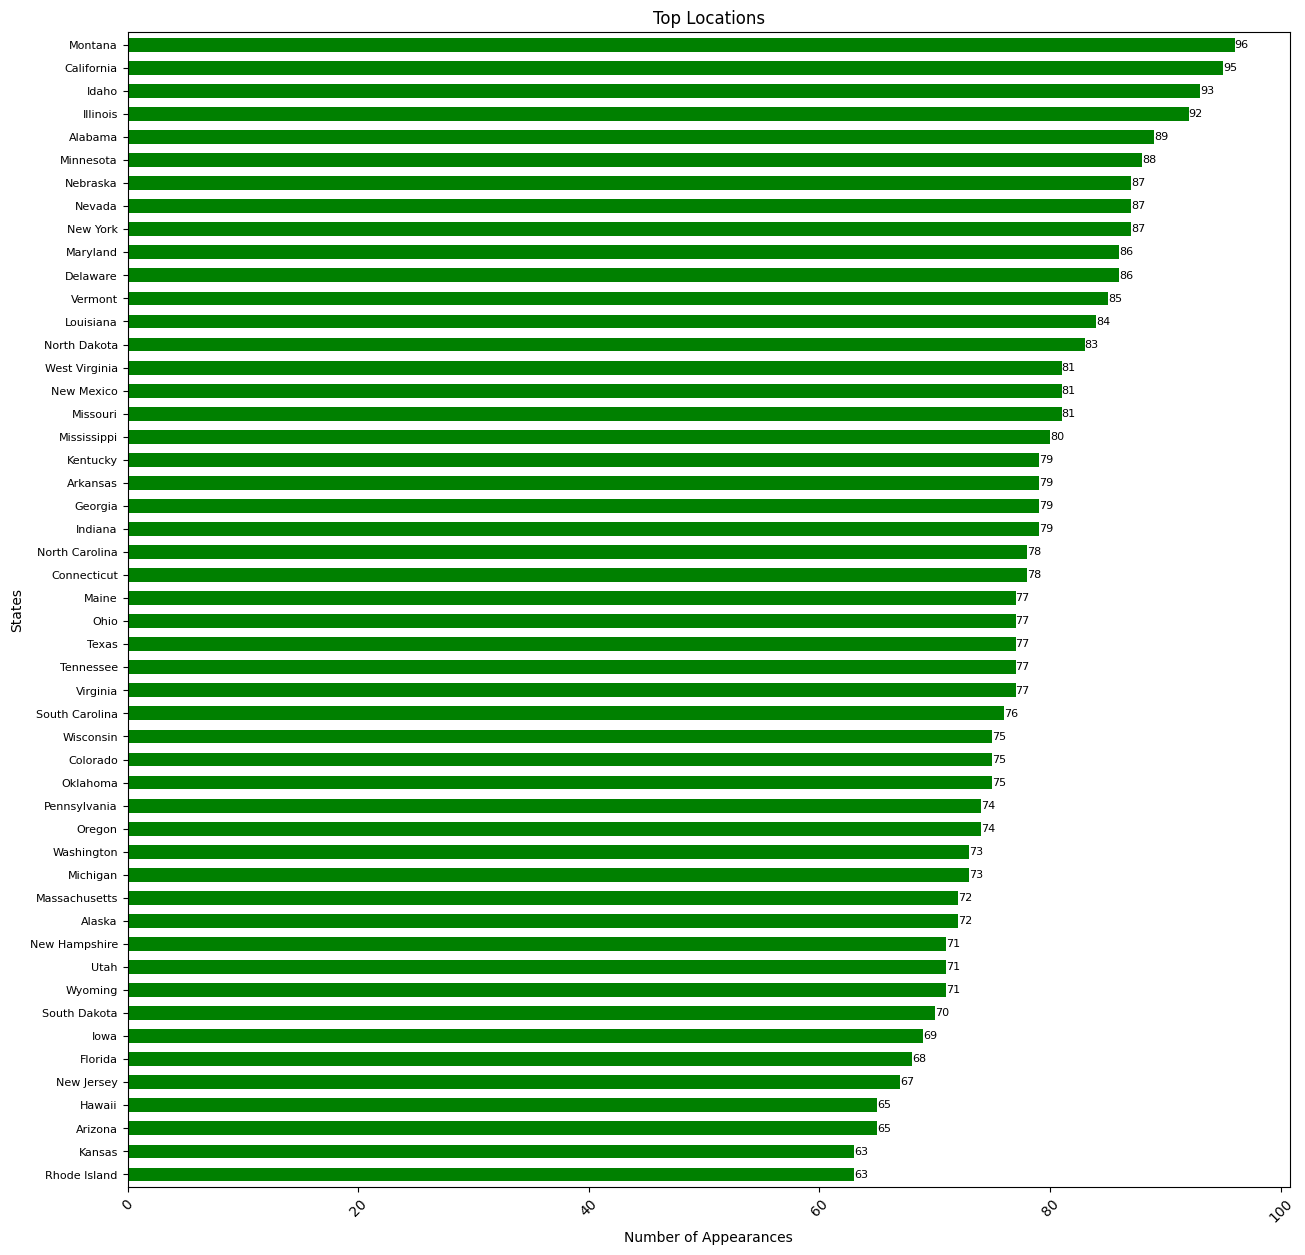

In [17]:
location_amount = df['Location'].value_counts().sort_values(ascending = True)
ax = location_amount.plot(kind = 'barh', color = 'green', figsize = (15,15), width = 0.6)

for bars in ax.containers:
    ax.bar_label(bars, label_type='edge', fontsize=8, color='black')

plt.title('Top Locations')
plt.xlabel('Number of Appearances')
plt.ylabel('States')
plt.xticks(rotation=45)
plt.yticks(fontsize=8)
plt.show()

#### The total Revenue per States

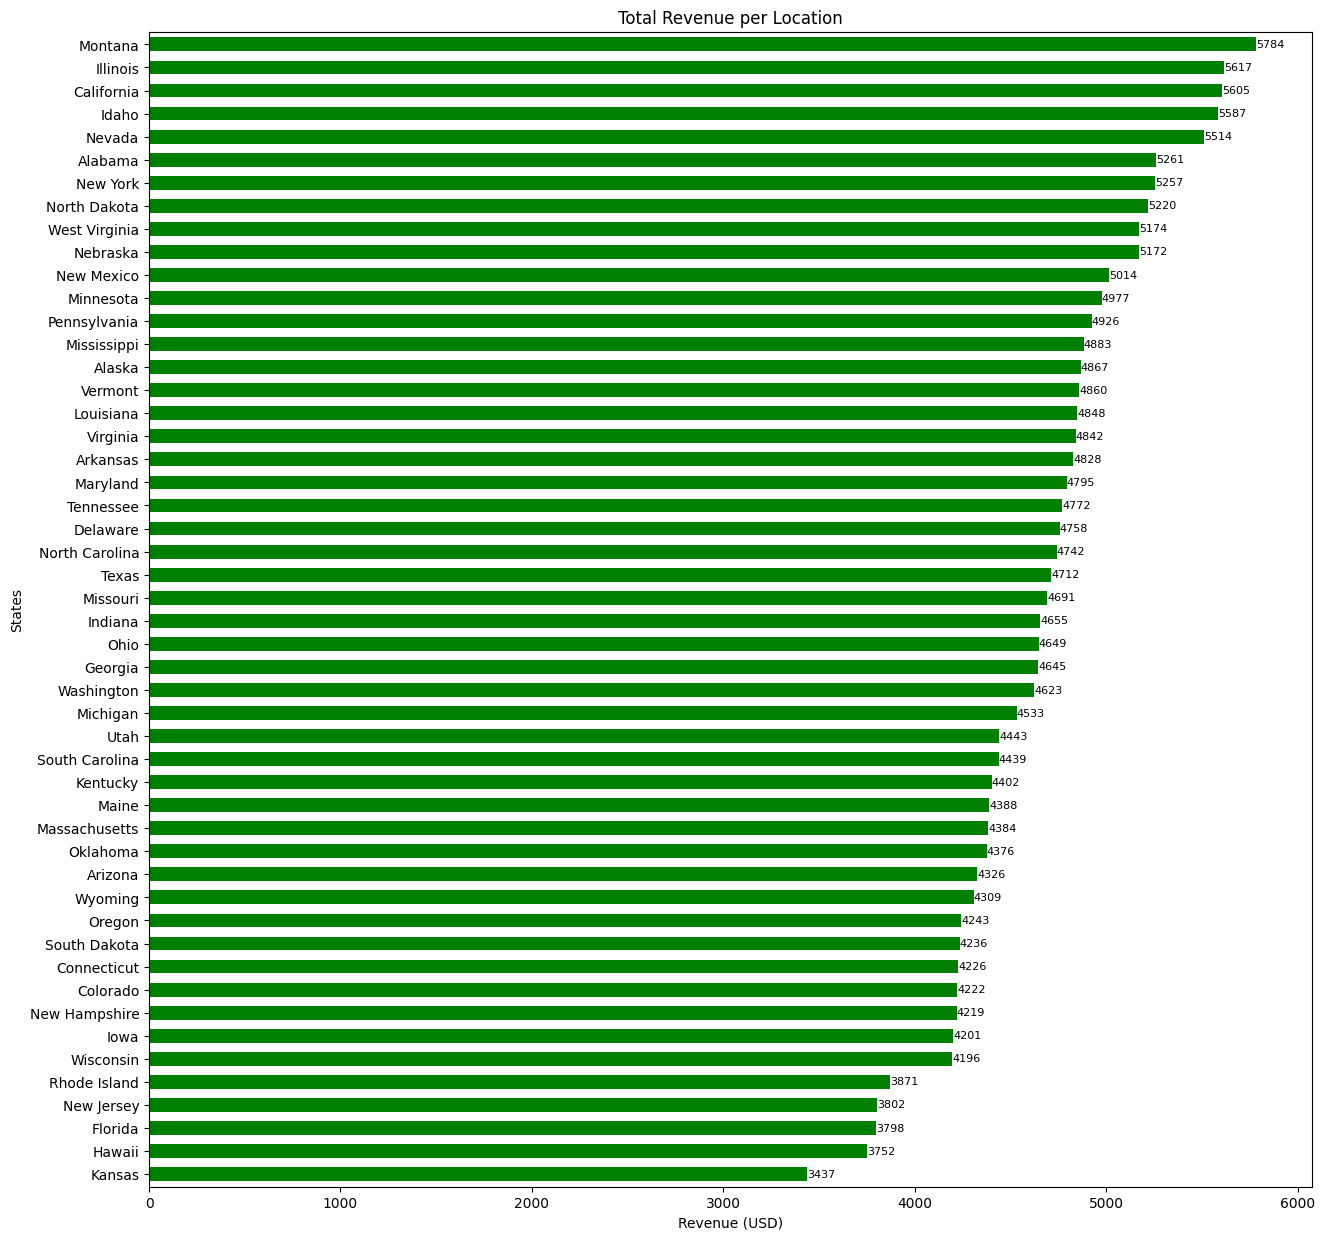

In [18]:
location_sales = df.groupby('Location')['Purchase Amount (USD)'].sum().sort_values(ascending = True)
ax = location_sales.plot(kind = 'barh', color = 'green', figsize = (15,15), width = 0.6)

for bars in ax.containers:
    ax.bar_label(bars, label_type='edge', fontsize=8, color='black')

plt.title('Total Revenue per Location')
plt.xlabel('Revenue (USD)')
plt.ylabel('States')
plt.show()

#### Analysing the Montana State ( TOP 1 Revenue)

#### Checking the most sold categories.

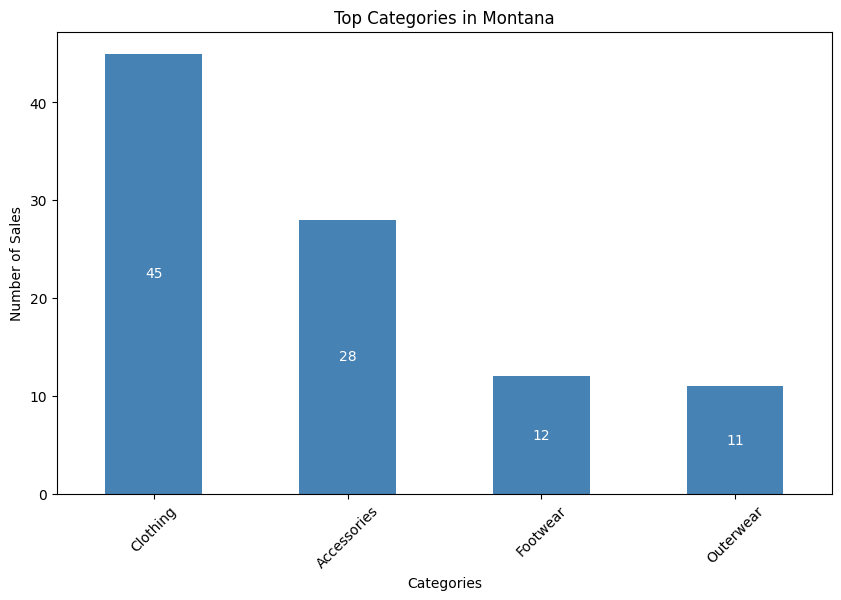

In [19]:
montana_state_category = df[df['Location'] == 'Montana']['Category'].value_counts()
ax = montana_state_category.plot(kind = 'bar', color = 'steelblue', figsize = (10,6))

for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=10, color='white')

plt.title('Top Categories in Montana')
plt.xlabel('Categories')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()

#### Total Revenue in the Montana State by categories.

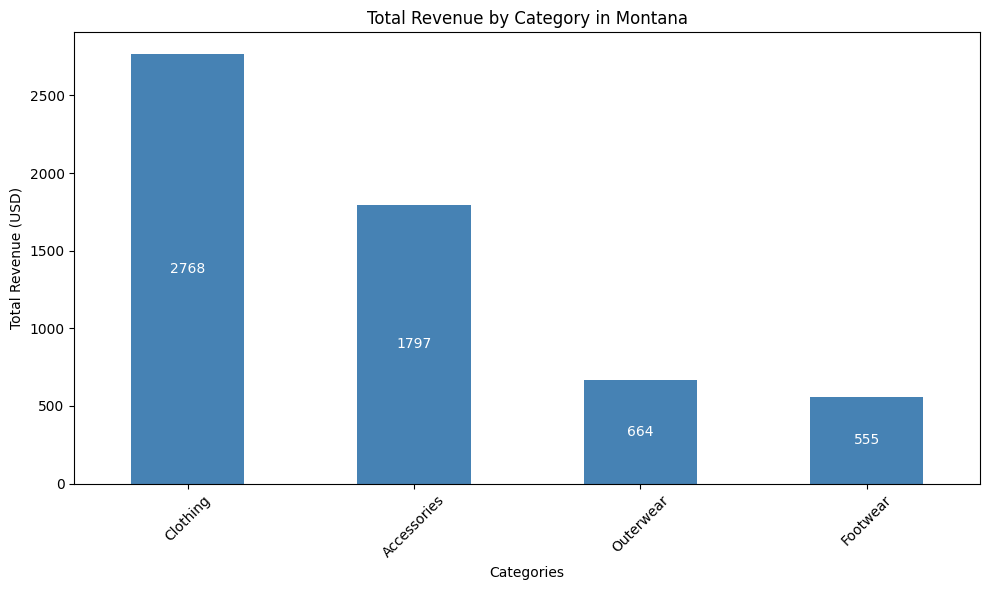

In [20]:
montana_data = df[df['Location'] == 'Montana']
montana_category_sales = montana_data.groupby('Category')['Purchase Amount (USD)'].sum().sort_values(ascending = False)
ax = montana_category_sales.plot( kind = 'bar', color = 'steelblue', figsize = (10,6))


for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=10, color='white')

plt.title('Total Revenue by Category in Montana')
plt.xlabel('Categories')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Analysing the Kansas State ( TOP 50 Revenue)

#### Checking the most sold categories.

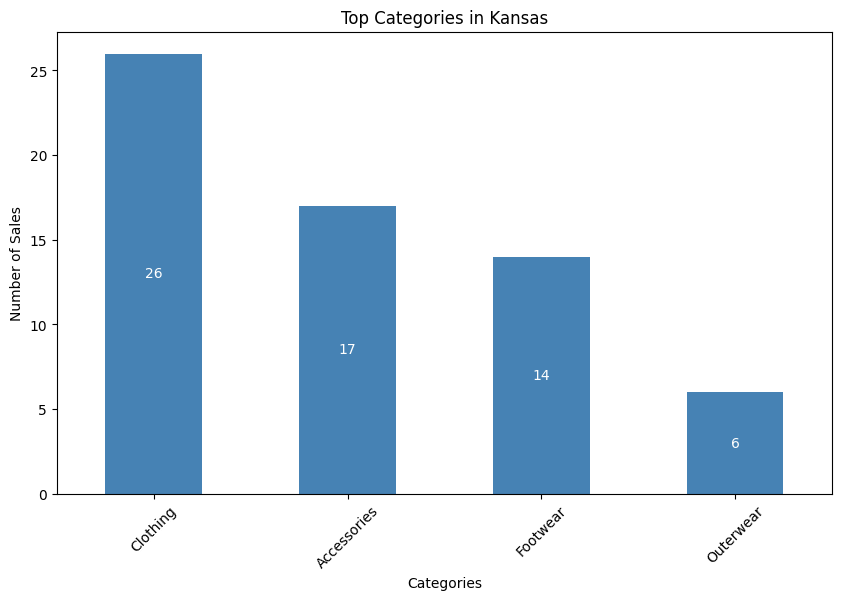

In [21]:
montana_state_category = df[df['Location'] == 'Kansas']['Category'].value_counts()
ax = montana_state_category.plot(kind = 'bar', color = 'steelblue', figsize = (10,6))

for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=10, color='white')

plt.title('Top Categories in Kansas')
plt.xlabel('Categories')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()

#### Total Revenue in the Kansas State by categories.

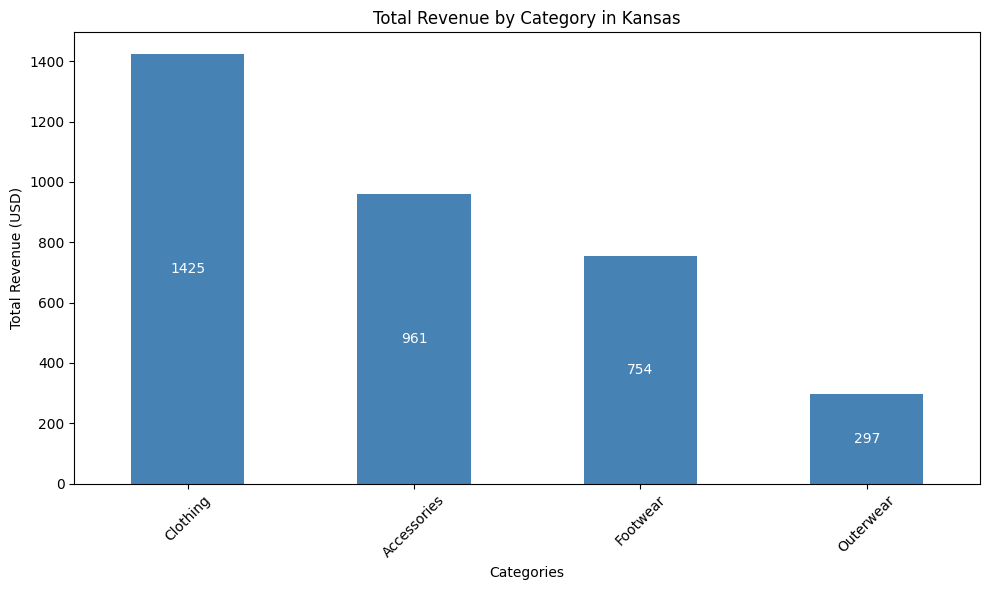

In [22]:
kansas_data = df[df['Location'] == 'Kansas']
kansas_category_sales = kansas_data.groupby('Category')['Purchase Amount (USD)'].sum().sort_values(ascending = False)
ax = kansas_category_sales.plot( kind = 'bar', color = 'steelblue', figsize = (10,6))


for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=10, color='white')

plt.title('Total Revenue by Category in Kansas')
plt.xlabel('Categories')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Discount Applied

#### Checking if the discount impacted in the Purchase Value.

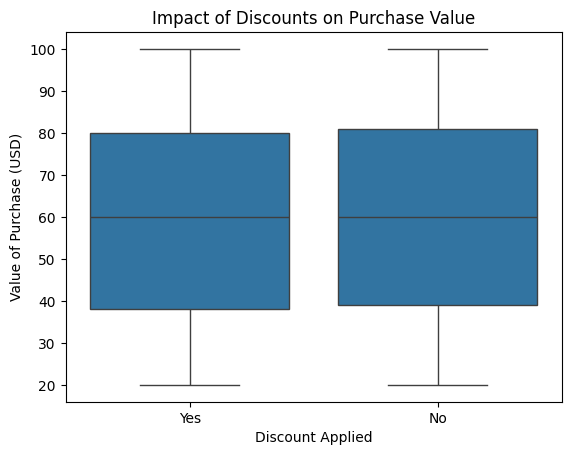

In [23]:
sns.boxplot(x = 'Discount Applied', y = 'Purchase Amount (USD)', data = df)
plt.title('Impact of Discounts on Purchase Value')
plt.xlabel('Discount Applied')
plt.ylabel('Value of Purchase (USD)')
plt.show()

### Payment Method

#### Most used Payment Methods

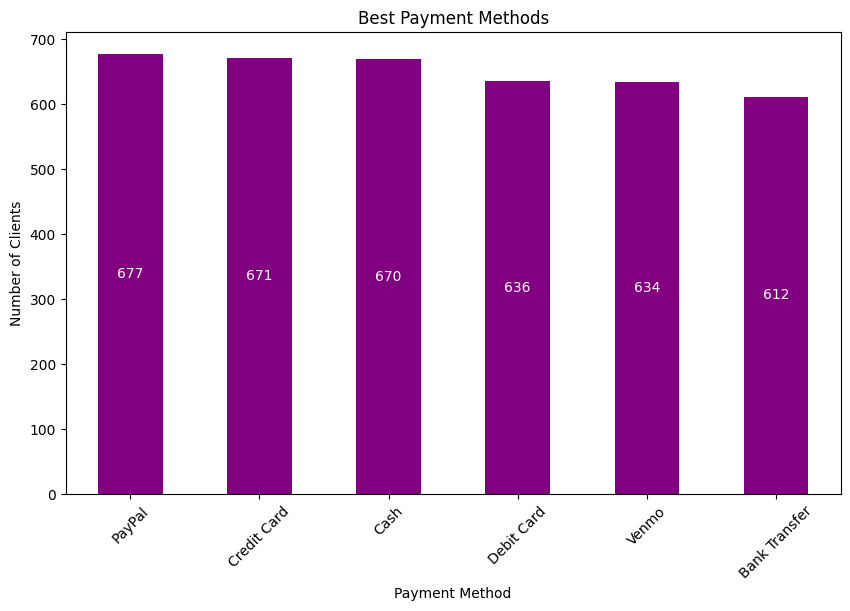

In [24]:
sub_preferred_payment = df['Preferred Payment Method'].value_counts()
ax = sub_preferred_payment.plot(kind = 'bar', color = 'purple', figsize = (10,6))

for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=10, color='white')

plt.title('Best Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Number of Clients')
plt.xticks(rotation=45)
plt.show()

#### Preferred Payment Method by Subscribers

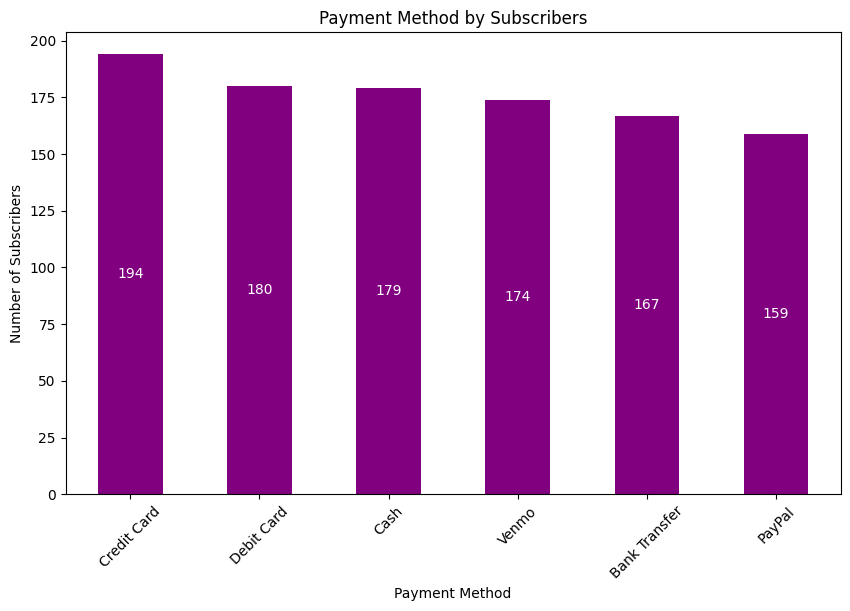

In [25]:
sub_payment = df[df['Subscription Status'] == 'Yes']['Payment Method'].value_counts()
ax = sub_payment.plot(kind = 'bar', color = 'purple', figsize = (10,6))

for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=10, color='white')

plt.title('Payment Method by Subscribers')
plt.xlabel('Payment Method')
plt.ylabel('Number of Subscribers')
plt.xticks(rotation=45)
plt.show()

#### Preferred Payment Method by Non Subscribers

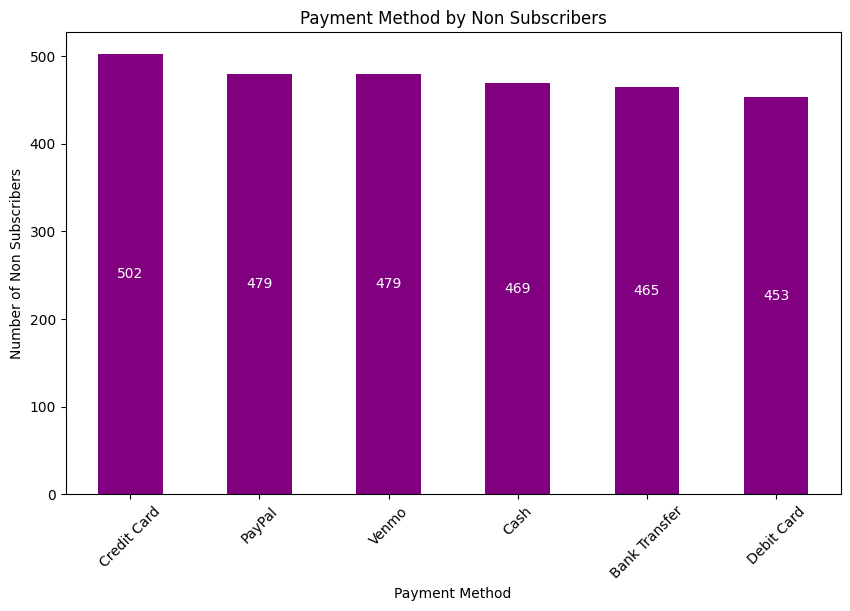

In [26]:
sub_payment = df[df['Subscription Status'] == 'No']['Payment Method'].value_counts()
ax = sub_payment.plot(kind = 'bar', color = 'purple', figsize = (10,6))

for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=10, color='white')

plt.title('Payment Method by Non Subscribers')
plt.xlabel('Payment Method')
plt.ylabel('Number of Non Subscribers')
plt.xticks(rotation=45)
plt.show()

### Shipping Type

#### Shipping Type Comparison by Subscribers x Non Subscribers

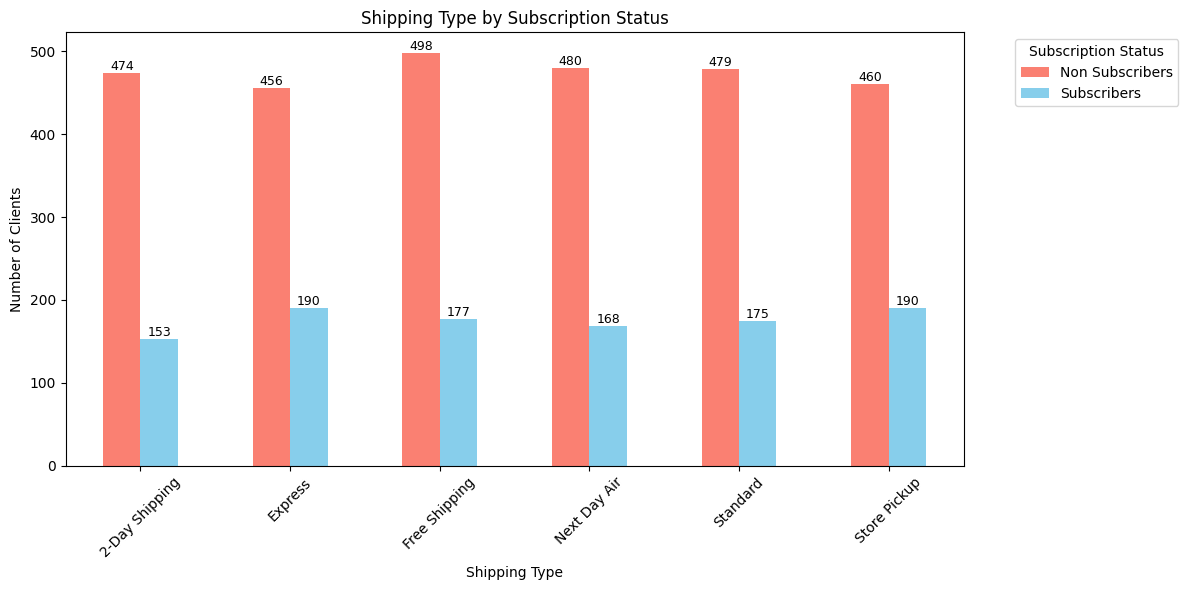

In [27]:
shipping_count = df.groupby(['Shipping Type', 'Subscription Status']).size().unstack()
ax = shipping_count.plot(kind = 'bar', color = ['salmon', 'skyblue'] ,figsize = (12,6))

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=9)

plt.title('Shipping Type by Subscription Status')
plt.xlabel('Shipping Type')
plt.ylabel('Number of Clients')
plt.xticks(rotation=45)
plt.legend(title='Subscription Status', labels=['Non Subscribers', 'Subscribers'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Shipping Type used by Subscribers

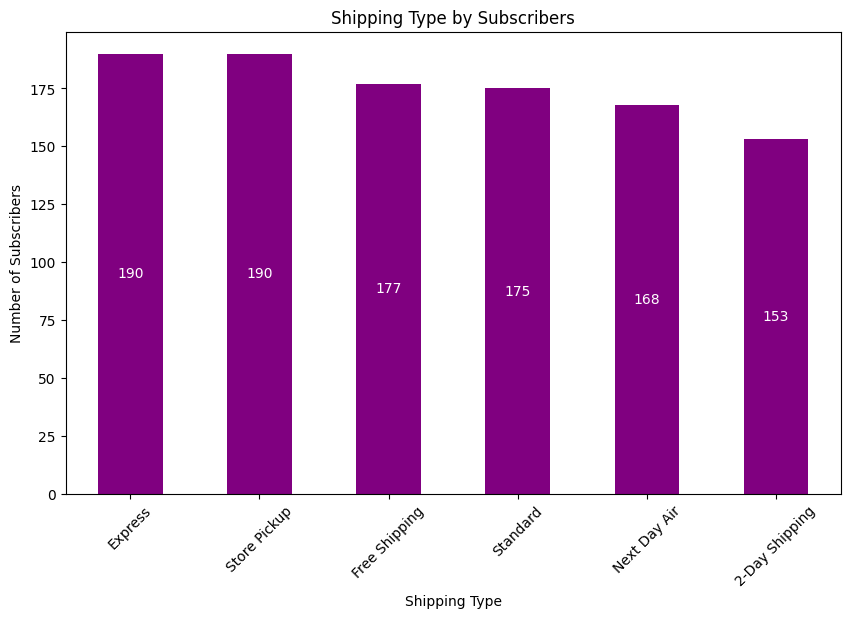

In [28]:
shipping_type = df[df['Subscription Status'] == 'Yes']['Shipping Type'].value_counts()
ax = shipping_type.plot(kind = 'bar', color = 'purple', figsize = (10,6))

for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=10, color='white')

plt.title('Shipping Type by Subscribers')
plt.xlabel('Shipping Type')
plt.ylabel('Number of Subscribers')
plt.xticks(rotation=45)
plt.show()

#### Shipping Type used by Non Subscribers

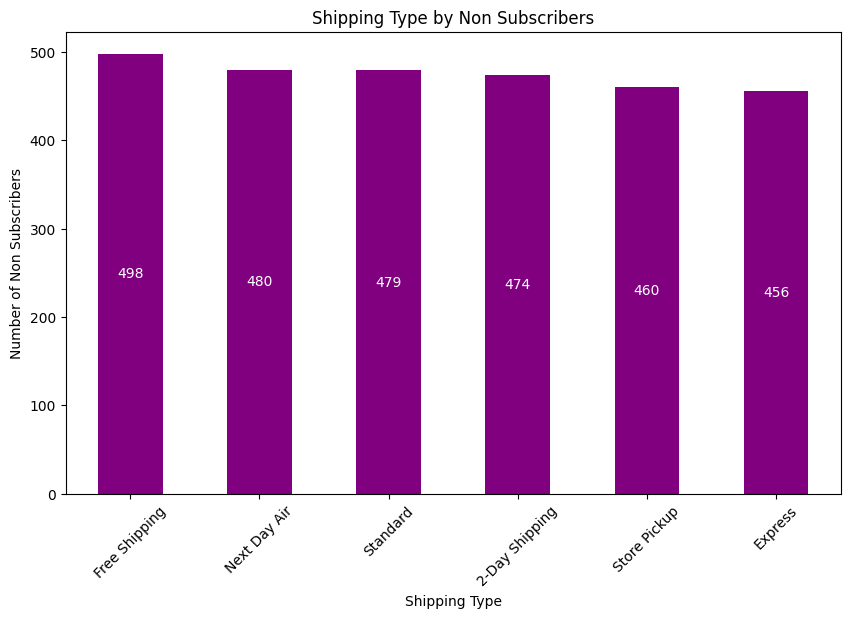

In [29]:
shipping_type = df[df['Subscription Status'] == 'No']['Shipping Type'].value_counts()
ax = shipping_type.plot(kind = 'bar', color = 'purple', figsize = (10,6))

for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=10, color='white')

plt.title('Shipping Type by Non Subscribers')
plt.xlabel('Shipping Type')
plt.ylabel('Number of Non Subscribers')
plt.xticks(rotation=45)
plt.show()

### Rating

#### Average Rating by Category

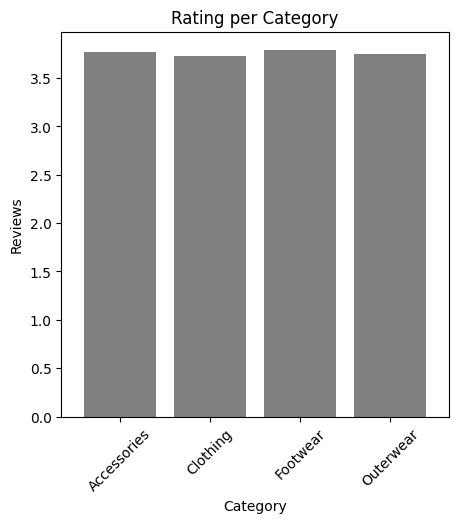

In [30]:
rating_category = df.groupby('Category')['Review Rating'].mean()    
rating_category.plot(kind='bar', color='grey', figsize=(5, 5), width = 0.8)

plt.title('Rating per Category')
plt.xlabel('Category')
plt.ylabel('Reviews')
plt.xticks(rotation=45)
plt.show()

#### Total of Ratings 

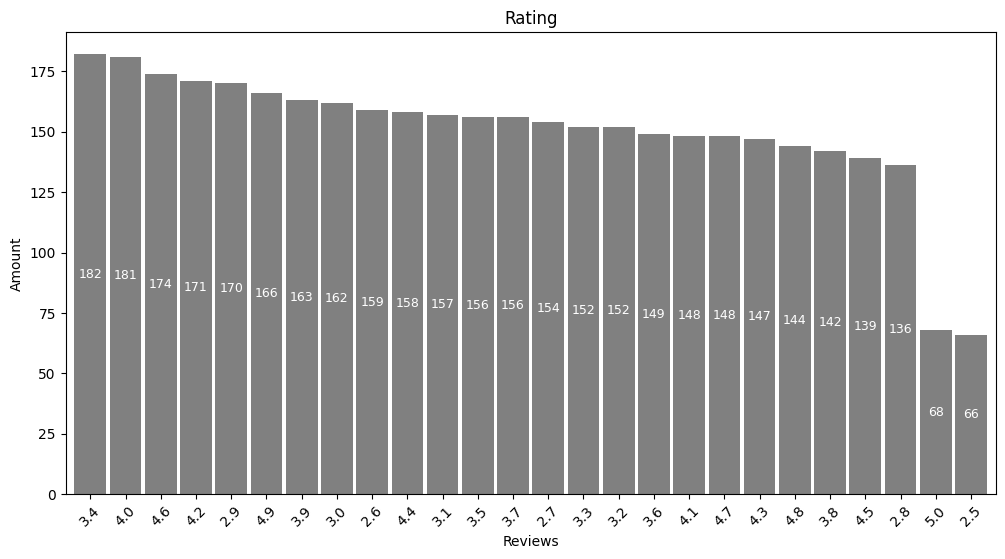

In [31]:
reas = df['Review Rating'].value_counts()
ax = reas.plot(kind = 'bar', figsize = (12,6), color = 'grey', width = 0.9)

for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=9, color='white')

plt.title('Rating')
plt.xlabel('Reviews')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

## Conclusion

#### Based on the analysis we can conclude:

There's a difference of more 1K Male than Female people shopping in this store.

There are many more people in the range of "46-60" years old. And less than 100 in the range of "<=18" years old.

We didn't find a huge difference between the frequency of purchases, they're almost the same.

Overall, the most sold category is "Clothing" with over than 1.7K products sold. And the least sold category is "Outerwear" with less than 500 products sold. 
Now, considering the sales by "Season", the category "Clothing" keeps being the #1 in all the seasons. 

Now, considering the products sold, the top 3 are: Blouse, Pants and Jewelry, with over than 170 sales. And the least sold product is: Jeans, with less than 130 sales.

There isn't a big difference in the product's price. The reange is "100-98" dollars.

The top 3 colors most sold are: Olive, Yellow and Silver, with over than 170 sales.

Talking about Location, Montana is the state that has more costumers buying, with 96. And Kansas followed by Rhode Island are the states with less costumers buying, both with 63 only.
Considering the Total Revenue by States. 
Montana State is the #1 with over than 5.7K dollars. More than 2.7K revenue is by "Clothing".
Kansas State is the #50 with less than 3.5K dollars. More than 1.4K revenue is by "Clothing".

After the analysis, we also can conclude that the discounts applied didn't have a huge impact on the Purchase Value.

Overall the Payment Method preferred is "PayPal". But the difference is small, less than 100 by the others.
Now looking only for the Subscribers, the most used payment method is the "Credit Card". 194 sales using this method.
Now looking only for the Non Subscribers, the most used payment method is also the "Credit Card". 502 sales using this method.

About the Clients, there many more "Non Subscribers" considering all the people that buy in this store.

Rating doesn't change a lot. The average by "Category" is 3,5.